## This notebook is an overview of the basics of CNN

## Convolutional Layers
Convolutional layers are used to extract features from images. Pixels are only related to adjacent and close pixels. Convolution allows the relationship between different parts of an image to be preserved by filtering an image with a smaller pixel filter to decrease the size of an image without loosing relationship between pixels. 

## Pooling Layers
Pooling layers are usually inserted after each convolution layer to reduce the spataial size of the convolved representation in order to reduce the computational complexity. Pooling layer also helps with overfitting. 

## Fully Connected Layers
Similar to a MLP, fully connected layers is usually used to classify the images.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras as keras
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


## Load the Train and Test data

In [2]:
train_data = pd.read_csv('data/train.csv')
print(train_data.shape)

test_data = pd.read_csv('data/test.csv')
print(test_data.shape)

(42000, 785)
(28000, 784)


In [3]:
# iloc: integer-location based indexing for selection by position.
# train.iloc[cols, rows]

# Make sure that the values are float to get decimal points after division
X_train = (train_data.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train_data.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test_data.values.astype('float32')

## Visualize Training data

(42000, 784)
(42000, 28, 28)


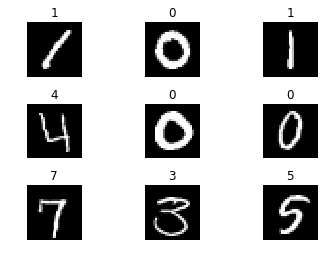

In [4]:
print(X_train.shape)
X_train = X_train.reshape(42000, 28, 28)
print(X_train.shape)
for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 0.5)
    plt.axis('off')
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


## One-hot encoding

In [6]:
y_train= keras.utils.to_categorical(y_train)
num_classes = y_train.shape[1]
print(num_classes)


10


In [7]:
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [8]:
# CNN Architecture
model = keras.Sequential([keras.layers.Conv2D(32, kernel_size=(5, 5), activation ='relu', input_shape=(28,28,1)),
                          keras.layers.Conv2D(32, kernel_size=(5, 5), activation ='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25),
                          
                          keras.layers.Conv2D(64, kernel_size=(3, 3), activation ='relu'),
                          keras.layers.Conv2D(64, kernel_size=(3, 3), activation ='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                          keras.layers.Dropout(0.25),
                          
                          keras.layers.Flatten(), 
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Cross Validation 

In [9]:
# Generate batches of tensor image data with real-time data augmentation
# Integrate generator with keras’ using ImageDataGenerator.flow()
generator = keras.preprocessing.image.ImageDataGenerator()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

batches = generator.flow(X_train, y_train, batch_size=64)
val_batches = generator.flow(X_val, y_val, batch_size=64)


## Training the model

In [10]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=30, validation_data=val_batches, validation_steps=val_batches.n)


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
525/525 [==============================] - 74s 141ms/step - loss: 0.2579 - acc: 0.9164 - val_loss: 0.0633 - val_acc: 0.9811
Epoch 2/30
525/525 [==============================] - 77s 147ms/step - loss: 0.0760 - acc: 0.9770 - val_loss: 0.0449 - val_acc: 0.9854
Epoch 3/30
525/525 [==============================] - 77s 146ms/step - loss: 0.0562 - acc: 0.9828 - val_loss: 0.0581 - val_acc: 0.9827
Epoch 4/30
525/525 [==============================] - 73s 139ms/step - loss: 0.0470 - acc: 0.9852 - val_loss: 0.0317 - val_acc: 0.9896
Epoch 5/30
525/525 [==============================] - 76s 144ms/step - loss: 0.0423 - acc: 0.9870 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 6/30
525/525 [==============================] - 76s 146ms/step - loss: 0.0361 - acc: 0.9893 - val_loss: 0.0418 - val_acc: 0.9885
Epoch 7/30
525/525 [==============================] - 76s 146ms/step - loss: 0.0341 - acc: 0.9896 - val_loss: 0.0246 - val_acc: 0.9926
Epoch 8

## Submitting to Kaggle

In [11]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})

submissions.to_csv("submission.csv", index=False, header=True)